In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [71]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from kneed import KneeLocator

In [5]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [6]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [187]:
df_train = df.drop(['word','PoS', 'concreteness', 'dominance', 'semsize','polysemy', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'log_freq', 'sentiment'], axis=1)
df_train.dtypes

arousal         float64
valence         float64
imageability    float64
familiarity     float64
aoa             float64
gender          float64
dtype: object

In [188]:
df_train.columns

Index(['arousal', 'valence', 'imageability', 'familiarity', 'aoa', 'gender'], dtype='object')

In [189]:
from sklearn import preprocessing

In [190]:
import warnings
warnings.filterwarnings('ignore')


In [191]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

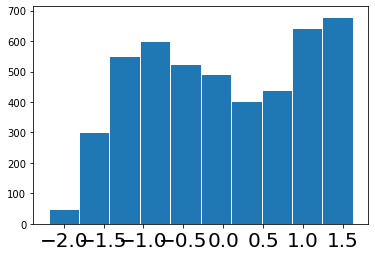

In [192]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

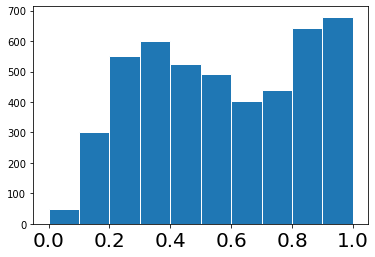

In [193]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

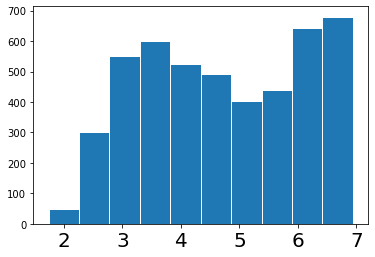

In [194]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [195]:
kmeans = KMeans( n_clusters=8, n_init=20, max_iter=100 )
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_init=20)

In [196]:
kmeans.labels_

array([1, 5, 1, ..., 6, 0, 1], dtype=int32)

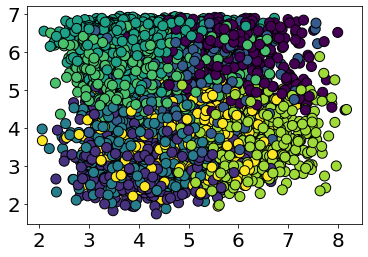

In [197]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [198]:
kmeans.cluster_centers_

array([[0.59196078, 0.73902975, 0.82802652, 0.81602773, 0.28842939,
        0.34780397],
       [0.35608026, 0.49457094, 0.29893323, 0.44314414, 0.79791302,
        0.54284874],
       [0.49493265, 0.23966707, 0.67814506, 0.73823308, 0.38105736,
        0.6328806 ],
       [0.3433621 , 0.54518977, 0.3490346 , 0.78706376, 0.40755122,
        0.49378736],
       [0.3171346 , 0.56183297, 0.87791232, 0.78501843, 0.29855943,
        0.56246004],
       [0.34200784, 0.52413981, 0.73541786, 0.54879691, 0.62552326,
        0.55963507],
       [0.64890392, 0.79785386, 0.37025635, 0.74679469, 0.57927507,
        0.43536692],
       [0.45201948, 0.206745  , 0.38804281, 0.64934394, 0.65969929,
        0.58235484]])

In [199]:
centers = kmeans.cluster_centers_

In [200]:
centers = scaler.inverse_transform(centers)

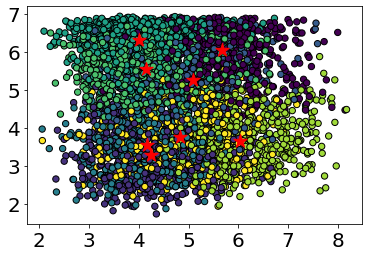

In [201]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

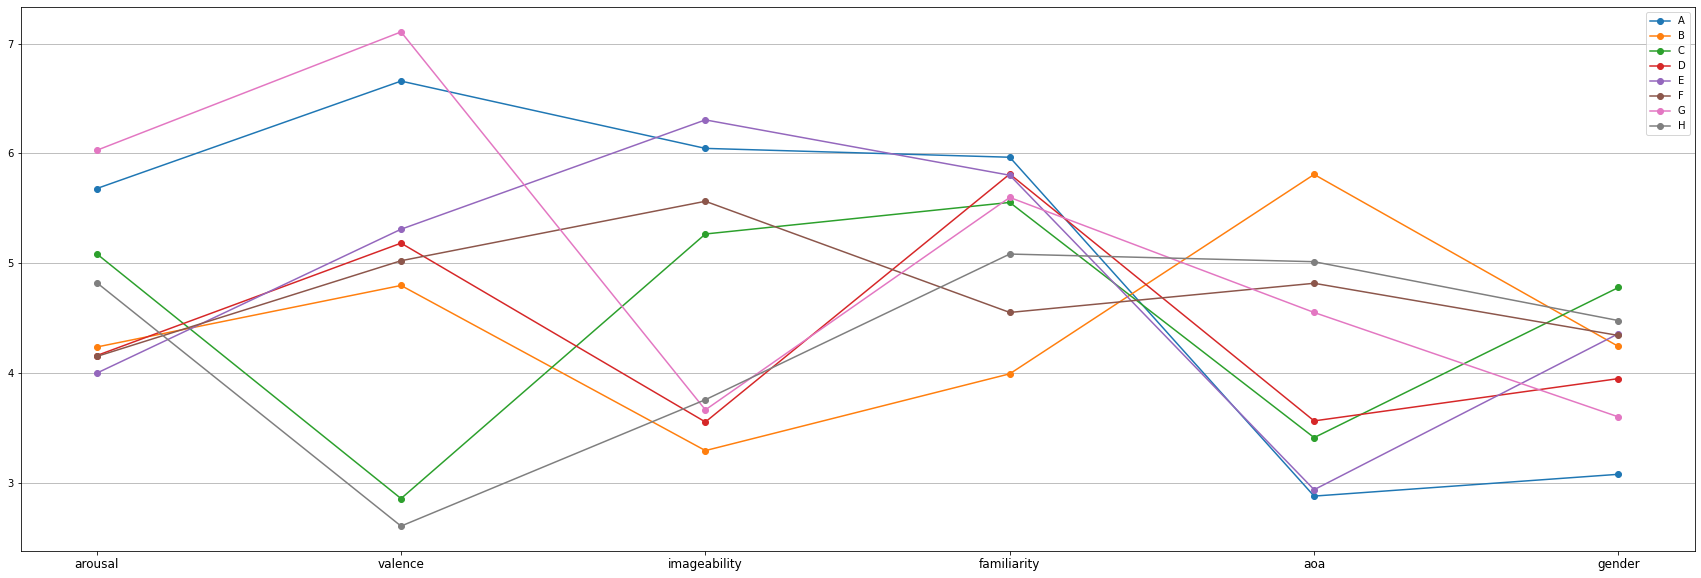

In [202]:
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D','E','F','G','H','I','L']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

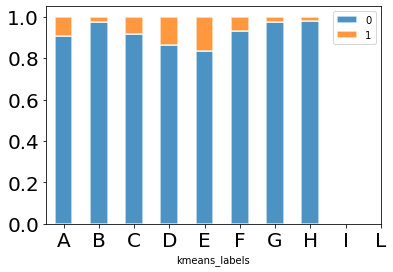

In [203]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [204]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([481, 608, 329, 598, 821, 718, 613, 514]))

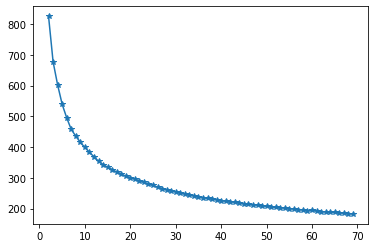

In [205]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, marker='*')
plt.show()

In [206]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 182.6944533846002
Silhouette 0.14458194751948233


In [207]:
train_data = df_train.values

In [208]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))



centers [[ 5.67844699e+00  6.65818711e+00  6.04625988e+00  5.96629522e+00
   2.87646570e+00  3.07908524e+00 -1.33226763e-15]
 [ 4.11671612e+00  4.98804850e+00  5.56772040e+00  4.54547646e+00
   4.80812411e+00  4.36717118e+00  5.00000000e+00]
 [ 5.00424363e+00  2.83489235e+00  5.14235127e+00  5.58837110e+00
   3.38152975e+00  4.73105949e+00  2.07082153e+00]
 [ 4.46478395e+00  5.55213272e+00  3.27208025e+00  4.34329630e+00
   5.70161111e+00  4.16599074e+00  1.00000000e+00]
 [ 5.67429775e+00  6.67574438e+00  3.69132303e+00  5.31059551e+00
   5.00959270e+00  3.59451404e+00  5.95505618e+00]
 [ 4.16971429e+00  5.29108885e+00  3.55900871e+00  5.80381185e+00
   3.57954355e+00  3.94189547e+00  2.99825784e+00]
 [ 4.82061988e+00  2.60074854e+00  3.75649123e+00  5.08587135e+00
   5.01224951e+00  4.47687135e+00  7.00000000e+00]
 [ 3.99660780e+00  5.30842509e+00  6.30584896e+00  5.80060414e+00
   2.93731060e+00  4.35863459e+00  4.00000000e+00]
 [ 6.45403636e+00  7.61080364e+00  3.73115273e+00  5.918

In [209]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [210]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

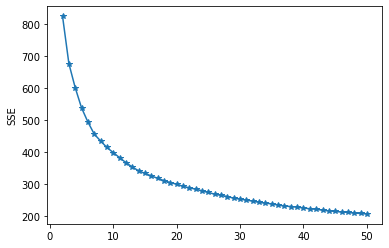

In [211]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [212]:
df_clusters[df_clusters['Labels']==3].describe()

,arousal,valence,imageability,familiarity,aoa,gender,kmeans_labels,Labels
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.0
mean,4.592957,5.400554,2.860141,4.151511,5.943370,4.114217,1.0,3.0
std,0.509802,0.675218,0.414548,0.447855,0.394404,0.452031,0.0,0.0
min,3.529000,3.969000,2.030000,3.000000,4.794000,3.143000,1.0,3.0
25%,4.232750,4.940500,2.496250,3.871750,5.709750,3.797000,1.0,3.0
50%,4.571000,5.448000,2.884000,4.109000,5.985500,4.088000,1.0,3.0
75%,5.007500,5.849000,3.225250,4.474500,6.250000,4.335500,1.0,3.0
max,5.567000,6.970000,3.706000,5.257000,6.645000,5.172000,1.0,3.0


In [213]:
dbscan = DBSCAN( eps=0.3, min_samples=10)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3, min_samples=10)

In [214]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

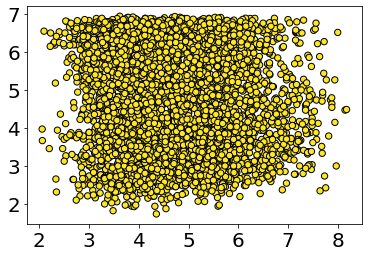

In [215]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

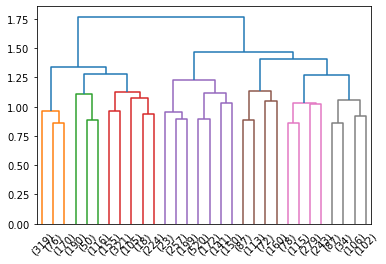

In [216]:
#hierarchical
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [217]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='single')

In [218]:
hier.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [219]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [220]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=90, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [221]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=13, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 821, 1: 516, 2: 450, 3: 336, 4: 340, 5: 353, 6: 309, 7: 464, 8: 255, 9: 268, 10: 127, 11: 271, 12: 172}
silhouette 0.22623481434318268


In [222]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 4646, 1: 26, 2: 2, 3: 4, 4: 3, 5: 1}
silhouette -0.07559996120265937


In [223]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 1218, 1: 1409, 2: 1059, 3: 57, 4: 744, 5: 195}
silhouette -0.07516689586189566


In [224]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# DBSCAN

In [225]:
train_data = df_train.values

In [226]:
#K=10
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=10
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

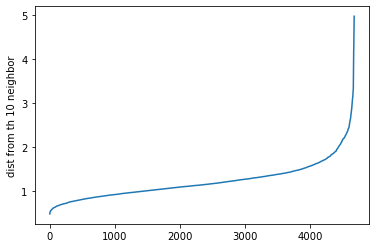

In [227]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 10 neighbor')
         
plt.show()

In [228]:
#K=15
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=15
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

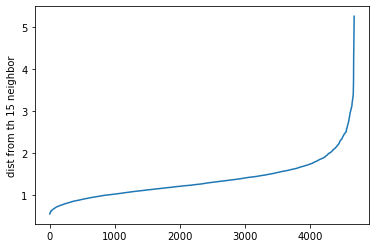

In [229]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 15 neighbor')
         
plt.show()

In [230]:
#K=13
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

k=13
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

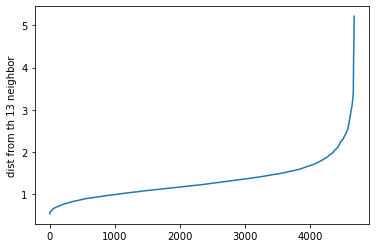

In [231]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 13 neighbor')
         
plt.show()

In [232]:
# MIN SAMPLES = 10
print ('dbscan')

dbscan = DBSCAN(eps=1.30, min_samples=10, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 1218, 1: 1409, 2: 1059, 3: 57, 4: 744, 5: 195}
silhouette 0.37090661956104354


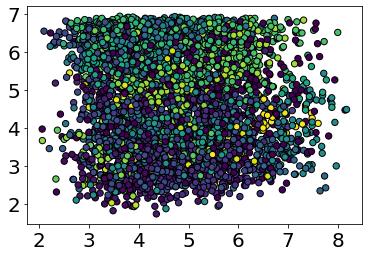

In [233]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [234]:
# MIN SAMPLES = 15
print ('dbscan')

dbscan = DBSCAN(eps=1.90, min_samples=15, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 1218, 1: 1409, 2: 1059, 3: 57, 4: 744, 5: 195}
silhouette 0.4550158078746417


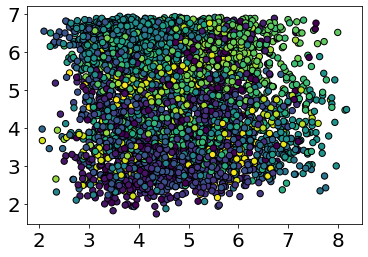

In [235]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [236]:
# MIN SAMPLES = 13
print ('dbscan')

dbscan = DBSCAN(eps=1.9, min_samples=13, metric='euclidean')
dbscan.fit(train_data)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 1218, 1: 1409, 2: 1059, 3: 57, 4: 744, 5: 195}
silhouette 0.4494585868106861
